In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments,Trainer, pipeline
from datasets import load_dataset
import numpy as np
import evaluate
from sklearn.metrics import classification_report
from bertviz import model_view,head_view
import shap
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

#### Downloading the base model and getting the tokenizer

In [2]:
model_name = 'bert-base-uncased-fake-news-classification'

In [3]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2,output_attentions = True)

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

#### Loading the data set

In [5]:
data = load_dataset('GonzaloA/fake_news')

Repo card metadata block was not found. Setting CardData to empty.


In [6]:
data = data.remove_columns(['Unnamed: 0','title'])

#### Exploratory Data Analysis

In [7]:
count_dict = dict()
for i in data:
    true_news = []
    fake_news = []
    for j in data[i]['label']:
        if j == 0:
            fake_news.append(j)
        else:
            true_news.append(j)
    count_dict[i] = (len(fake_news),len(true_news))

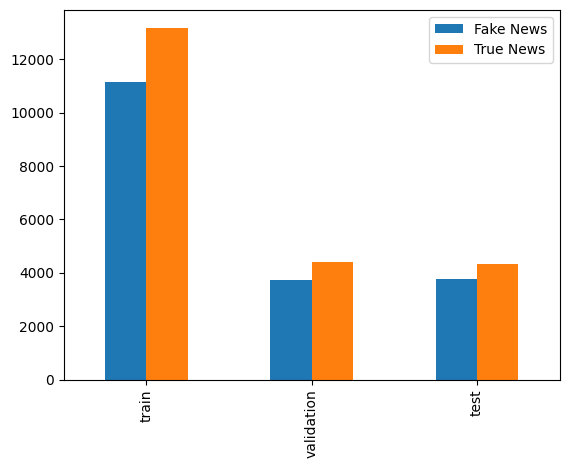

In [16]:
count_df = pd.DataFrame.from_dict(count_dict,orient = 'index')
count_df.rename(columns = {0:'Fake News',1:'True News'},inplace = True)
count_df.plot.bar();

In [9]:
len_count_dict = dict()
for i in data:
    true_news = []
    fake_news = []
    for j in data[i]:
        if j['label'] == 0:
            fake_news.append(len(j['text']))
        else:
            true_news.append(len(j['text']))
    len_count_dict[i] = (np.mean(fake_news),np.mean(true_news))

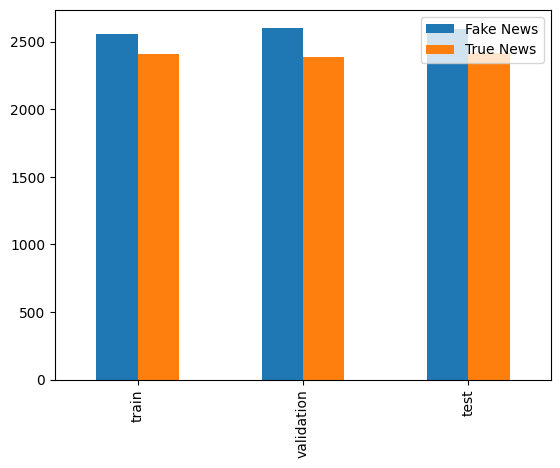

In [17]:
len_count_df = pd.DataFrame.from_dict(len_count_dict,orient = 'index')
len_count_df.rename(columns = {0:'Fake News',1:'True News'},inplace = True)
len_count_df.plot.bar();

In [22]:
tokenizer.get_vocab()

{'umm': 26114,
 '...': 2133,
 '##swell': 19228,
 'shades': 13178,
 'reformer': 24767,
 '##ando': 28574,
 '##burgh': 15496,
 'athena': 21880,
 'ץ': 1262,
 'rods': 19485,
 '[unused52]': 53,
 'gang': 6080,
 'forearms': 27323,
 'removal': 8208,
 '»': 1090,
 'merchants': 10310,
 'mythological': 21637,
 'temperance': 23372,
 'packard': 24100,
 'wears': 11651,
 'remembered': 4622,
 '##ragan': 28905,
 '[unused549]': 554,
 '##nch': 12680,
 'jill': 10454,
 'jennings': 14103,
 '##etti': 18319,
 'insider': 25297,
 'condensed': 25011,
 '[unused835]': 840,
 '##খ': 29890,
 'denise': 15339,
 'accompaniment': 22205,
 '##ester': 20367,
 '##cks': 10603,
 '阿': 1971,
 'men': 2273,
 'kelly': 5163,
 'ads': 14997,
 'adventist': 25696,
 'titled': 4159,
 'vegas': 7136,
 'vocalists': 27478,
 '##hn': 7295,
 'seduce': 23199,
 'api': 17928,
 'vincent': 6320,
 'embodied': 25405,
 'leiden': 20329,
 '[unused706]': 711,
 'ո': 1232,
 'contained': 4838,
 'catching': 9105,
 'expenditure': 20700,
 'souls': 9293,
 'sacked':

#### Inspecting the model and the head

In [ ]:
inputs = tokenizer.encode(data['test'][9]['text'], return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]  # Output includes attention weights when output_attentions=True
tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 

In [ ]:
# head_view(attention, tokens)

In [ ]:
# model_view(attention, tokens)

#### Inspecting the model's attention

In [27]:
pipe = pipeline('text-classification',model=model_name, top_k=None)

In [28]:
explainer = shap.Explainer(pipe)

In [29]:
shap_values = explainer([data['train'][8]['text']])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [03:45, 225.40s/it]              


In [30]:
shap.plots.text(shap_values)